In [125]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

Title of Project: Did Steve Nash really deserve his MVPs?

Hypotehsis: Steve Nash's assists, pts and minutes won the Suns games. Thus can we use these variables to retroactively predict the Suns' post season and how accurate is it?

Link: https://www.landofbasketball.com/nba_players_game_logs/2005/steve_nash.htm

I actually know how to extract data from html better this time thus I can now get and access better data, but also getting table from raw html means a lot of the data will be bad or misformatted

In [126]:
def WL(x):
    if x.__contains__('W'):
        return 1
    else:
        return 0

In [127]:
data = pd.read_csv("nash_05.csv", index_col=False)
data['WL']=data['WL'].map(lambda x: WL(x))
data.drop(['Unnamed: 18'],axis=1, inplace=True)
pts_ = data['Score'].copy()
for i in range(pts_.size):
    if pts_[i].__contains__("OT"):
        pts_[i]=pts_[i].replace("OT", '')
    pts_[i] = pts_[i].split("-")
    pts_[i] = int(pts_[i][0])-int(pts_[i][1])

pts = pd.Series(pts_)
data['pts_dif'] = pts
reg = data.iloc[:76]
post = data.iloc[76:]
reg

/tmp/ipykernel_2326/2608845753.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv("nash_05.csv", index_col=False)


,Gm,Date,Opponent,WL,Score,Min,Pts,ORb,DRb,Reb,Ast,Stl,Blk,TO,PF,FGM/A,3PM/A,FTM/A,pts_dif
0,1,Nov. 03,vs. Hawks,1,112 - 82,24,12,0,3,3,4,2,0,3,2,6,-,12,30
1,2,Nov. 05,@ 76ers,1,108 - 98,32,9,0,4,4,10,0,0,4,5,3,-,5,10
2,3,Nov. 06,@ Nets,1,112 - 80,37,17,1,1,2,8,3,0,6,0,6,-,8,32
3,4,Nov. 09,@ Bulls,1,94 - 74,33,8,0,3,3,12,0,0,1,3,3,-,9,20
4,5,Nov. 10,@ Cavaliers,0,109 - 114OT,50,15,1,6,7,17,0,0,1,5,5,-,13,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,Apr. 12,vs. Hornets,1,99 - 85,35,6,2,1,3,13,1,0,2,1,3,-,11,14
72,73,Apr. 15,vs. Clippers,1,98 - 91,41,14,2,1,3,11,1,0,4,2,6,-,17,7
73,74,Apr. 16,vs. Kings,1,116 - 98,26,4,0,6,6,11,0,0,3,2,2,-,3,18
74,75,Apr. 18,vs. Nuggets,1,128 - 114,26,8,0,0,0,13,2,0,4,1,2,-,2,14


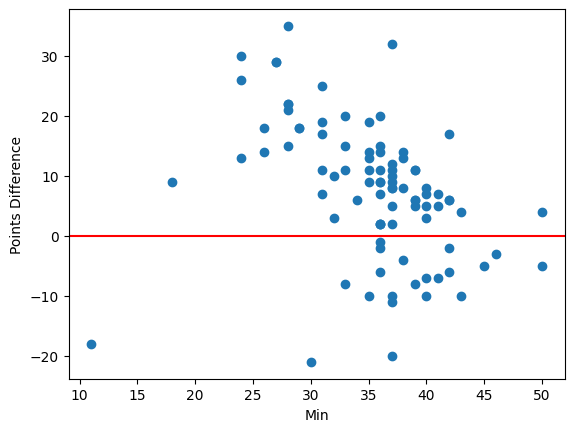

In [128]:
features=['Min', 'Pts', 'Ast']
plt.plot(data['Min'], data['pts_dif'], 'o')
plt.xlabel("Min")
plt.ylabel("Points Difference")
plt.axhline(y = 0, color = 'r', linestyle = '-') 

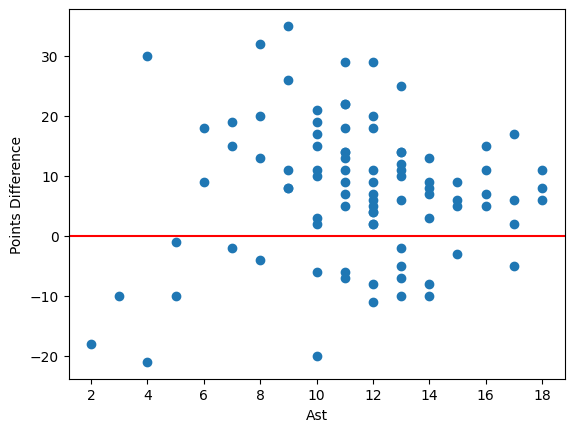

In [129]:
plt.plot(data['Ast'], data['pts_dif'], 'o')
plt.xlabel("Ast")
plt.ylabel("Points Difference")
plt.axhline(y = 0, color = 'r', linestyle = '-') 

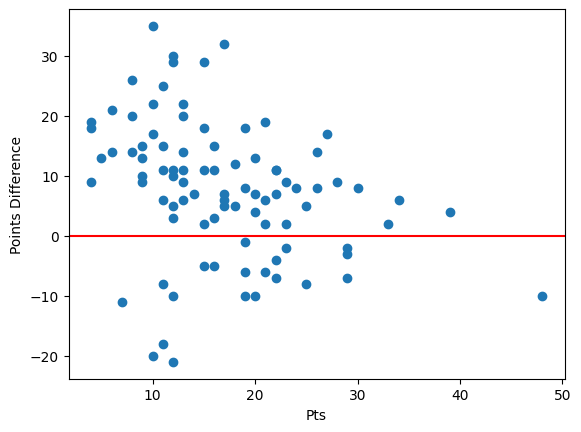

In [130]:
plt.plot(data['Pts'], data['pts_dif'], 'o')
plt.xlabel("Pts")
plt.ylabel("Points Difference")
plt.axhline(y = 0, color = 'r', linestyle = '-') 

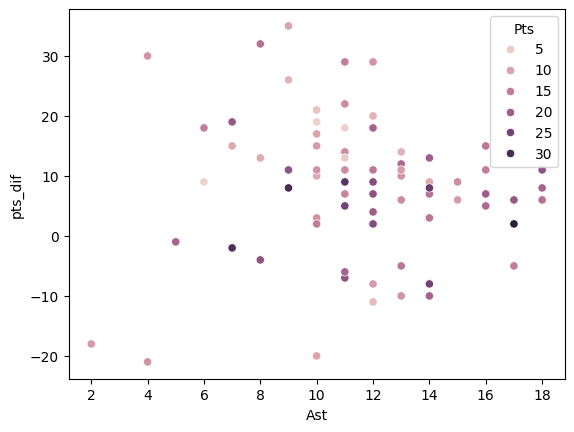

In [131]:
_ = sns.scatterplot(x='Ast', y='pts_dif', hue='Pts', data=reg)

[Text(0.4, 0.9615384615384616, 'Min <= 44.0\ngini = 0.317\nsamples = 76\nvalue = [15.0, 61.0]'),
 Text(0.3333333333333333, 0.8846153846153846, 'Ast <= 5.5\ngini = 0.29\nsamples = 74\nvalue = [13, 61]'),
 Text(0.3666666666666667, 0.9230769230769231, 'True  '),
 Text(0.2, 0.8076923076923077, 'Min <= 27.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.13333333333333333, 0.7307692307692307, 'Pts <= 11.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06666666666666667, 0.6538461538461539, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.6538461538461539, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.26666666666666666, 0.7307692307692307, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4666666666666667, 0.8076923076923077, 'Min <= 32.5\ngini = 0.245\nsamples = 70\nvalue = [10, 60]'),
 Text(0.4, 0.7307692307692307, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.5333333333333333, 0.7307692307692307, 'Ast <= 14.5\ngini = 0.32\nsamples = 50\nvalue = [10, 40]'

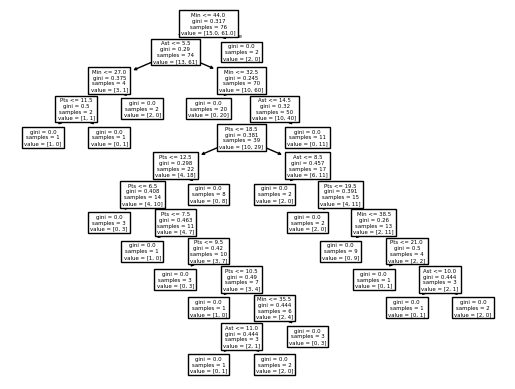

In [132]:
X = reg[features]
y = reg['WL']
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

model score: 0.782608695652174


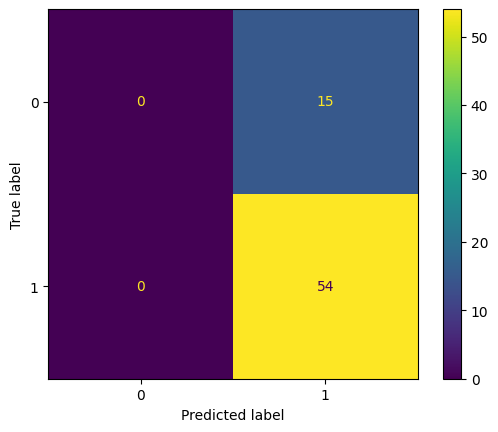

In [133]:
def test_train_opt_sp():
    score = {}
    mx = 0
    i = 0.1
    while i <= 0.9:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
        dt_model = DecisionTreeClassifier().fit(X_train, y_train)
        score[dt_model.score(X_test, y_test)] = i
        i+=0.1
    for k in score.keys():
        if k > mx:
            mx = k
    return score[mx], mx

t = test_train_opt_sp()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t[0], random_state=42)
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
print("model score:", t[1])
cm = confusion_matrix(y_test, dt_model.predict(X_test))  #.ravel()
_ = ConfusionMatrixDisplay(cm).plot()

In [134]:
true_res = post['WL']
def f1(true, pred):
    count = 0
    for i in range(len(true)):
        if pred[i] == 1 and pred[i] == true[i]:
            count+=1
    return (2*count)/(2*len(true))

In [135]:
pred = dt_model.predict(post[features])

f1_score(true_res, pred)

0.7272727272727273

The f1_score combines recall and precision so I "trust" it the most, the model always predict that steve nash will win those post season games as he usually does score and assist a lot during these games, plus his team basically play him heavy minutes in these games. I also remove any games he didnt play thus replacing those with 0s can be an area of improvement (the html table just listed did not play). Basketball is a multifaceted sport thus Steve Nash scoring/assisting a lot is a good thing and his win has a higher chance of winning when he does that, but it doesnt mean that he will win. I got a f1 score of 0.72 which for sports is pretty good.